In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
from abc import ABC, abstractmethod 

In [3]:
class maneuver_classifier(ABC):
    @abstractmethod
    def __init__(self, dataframe):
        self.dataframe = dataframe
        pass
    
    def train_data(self): #Trains on the provided data set
        pass
    
    def predict_data(self): #Predicts and tell the accuracy of the trained algorithm
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        pass

In [4]:
class SVM_algo(maneuver_classifier):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.algo = None
    
    def train_data(self): #Trains on the provided data set
        X = np.array(self.dataframe[:, :-1])
        y = np.array(self.dataframe[:, -1])
        
        print(X.shape)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        
        # defining parameter range 
        param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} 
        
        grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 2)

        #grid.fit(X_train, y_train) 
        
        grid.fit(X, y) 
        
        
        self.algo = grid
        
        # print best parameter after tuning 
        print(grid.best_params_) 

        # print how our model looks after hyper-parameter tuning 
        print(grid.best_estimator_) 
        
        grid_predictions = grid.predict(X_test) 
        
        print(classification_report(y_test, grid_predictions)) 
        
        grid_confidence = grid.score(X_test, y_test)
        print(grid_confidence)
        
        cm = confusion_matrix(y_test, grid_predictions)
        
        print(cm)
        
        plot_confusion_matrix(grid, X_test, y_test)
        #cm.plot()
        
        plt.show()

        
        
        
    def predict_data(self, data): #Predicts and tell the accuracy of the trained algorithm
        data = self.ret_normalize_data(data)
        X = np.array(data[:, :-1])
        y = np.array(data[:, -1])
        
        print(X.shape)
        
        grid_predictions = self.algo.predict(X)
        print(classification_report(y, grid_predictions)) 
        
        for i in range(len(y)):
            print("Real: "+ y[i]+ " Predicted: " + grid_predictions[i] )
            
        
        
        grid_confidence = self.algo.score(X, y)
        print(grid_confidence)
        
        cm = confusion_matrix(y, grid_predictions)
        
        print(cm)
        
        plot_confusion_matrix(self.algo, X, y)
        #cm.plot()
        
        plt.show()
        
        
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        df = self.dataframe.drop(['maneuver'], 1)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,self.dataframe['maneuver']])
        self.dataframe = result
        pass

    def ret_normalize_data(self, data): #Normalizes data based on the requirement
        data = data.dropna()
        df = data.drop(['maneuver'], 1)
        #df = df.fillna(0)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,data['maneuver']])
        return result
        



In [5]:
train_com_6 = pd.read_excel("bm_6_processed.xlsx", "Combined")


In [6]:
test_com_6 = train_com_6.loc[train_com_6['tripid'] == 20141018]

In [7]:
indexNames = train_com_6[train_com_6['tripid'] == 20141018 ].index

In [8]:
train_com_6.drop(indexNames , inplace=True)

In [9]:
print(train_com_6)

      Unnamed: 0           timestamp    tripid     aM0_x     aM1_x     aM2_x  \
0              0 2020-06-23 16:29:18  20150125 -0.027009  0.105178  0.516335   
1              1 2020-06-23 16:29:18  20150125  0.121701  0.548296  1.009684   
2              2 2020-06-23 16:29:18  20150125  0.927492  1.404342  1.552078   
3              3 2020-06-23 16:29:36  20150125 -0.933097 -1.022965 -1.599922   
4              4 2020-06-23 16:29:36  20150125 -1.382439 -1.866652 -1.522774   
...          ...                 ...       ...       ...       ...       ...   
5243        5243 2020-06-23 11:48:00  20140917  0.363266  0.431550  0.424555   
5244        5244 2020-06-23 11:48:00  20140917  0.499834  0.457002  0.467033   
5245        5245 2020-06-23 11:48:00  20140917  0.408816  0.449668  0.392259   
5246        5246 2020-06-23 11:48:00  20140917  0.485981  0.384900  0.404721   
5247        5247 2020-06-23 11:48:00  20140917  0.271505  0.247553  0.183673   

         aM3_x     aM4_x     aM5_x    a

In [10]:
for i in range(3):
    train_com_6 = train_com_6.drop(train_com_6.columns[0], axis = 1)
    test_com_6 = test_com_6.drop(test_com_6.columns[0], axis = 1)
    


In [11]:
train_com_6.head

<bound method NDFrame.head of          aM0_x     aM1_x     aM2_x     aM3_x     aM4_x     aM5_x    aMD0_x  \
0    -0.027009  0.105178  0.516335  0.971288  1.180018  1.353375 -0.027009   
1     0.121701  0.548296  1.009684  1.215519  1.385477  1.534587  0.116470   
2     0.927492  1.404342  1.552078  1.674340  1.791476  1.828494  0.907441   
3    -0.933097 -1.022965 -1.599922 -1.410454 -1.164450 -1.054394 -0.920525   
4    -1.382439 -1.866652 -1.522774 -1.200043 -1.068257 -1.001935 -1.382439   
...        ...       ...       ...       ...       ...       ...       ...   
5243  0.363266  0.431550  0.424555  0.440350  0.408332  0.414451  0.322902   
5244  0.499834  0.457002  0.467033  0.419921  0.424920  0.339341  0.538510   
5245  0.408816  0.449668  0.392259  0.405657  0.306513  0.219348  0.391194   
5246  0.485981  0.384900  0.404721  0.283779  0.184899  0.178954  0.504084   
5247  0.271505  0.247553  0.183673  0.166164  0.166548  0.193347  0.318781   

        aMD1_x    aMD2_x    aMD3_

(5010, 138)
Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed: 62.5min finished


{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.91      0.74      0.82        90
     Aggressive left 45-turn       0.87      0.70      0.78        57
     Aggressive left 90-turn       0.87      0.90      0.88       338
 Aggressive left lane change       0.79      0.69      0.73       674
   Aggressive right 180-turn       1.00      1.00      1.00         3
    Aggressive right 45-turn       0.92      0.66      0.77       115
    Aggressive right 90-turn       0.93      0.93      0.93       449
Aggressive right lane change       0.73      0.85      0.79       779

                    accuracy                           0.81      2505
          

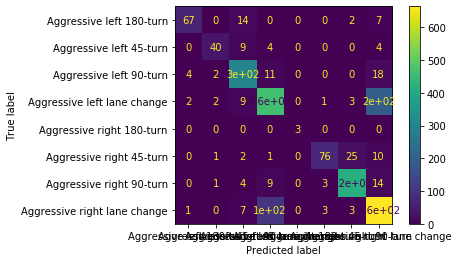

In [12]:
alg_com_6 = SVM_algo(train_com_6)
alg_com_6.normalize_data()
alg_com_6.train_data()

(5010, 138)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.93      0.77      0.84       168
     Aggressive left 45-turn       0.90      0.68      0.77       118
     Aggressive left 90-turn       0.88      0.89      0.88       667
 Aggressive left lane change       0.78      0.69      0.73      1391
   Aggressive right 180-turn       1.00      1.00      1.00         6
    Aggressive right 45-turn       0.91      0.65      0.76       212
    Aggressive right 90-turn       0.93      0.92      0.93       902
Aggressive right lane change       0.72      0.85      0.78      1546

                    accuracy                           0.81      5010
                   macro avg       0.88      0.81      0.84      5010
                weighted avg       0.81      0.81      0.81      5010

Real: Aggressive left lane change Predicted: Aggressive left lane change
Real: Aggressive left lane change Predicted: Aggressive left lane change

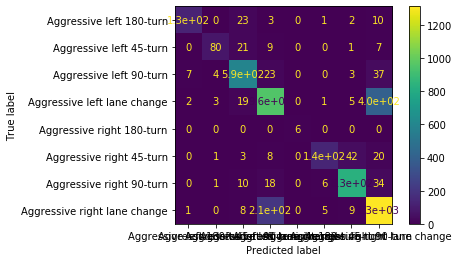

In [14]:
alg_com_6.predict_data(train_com_6)